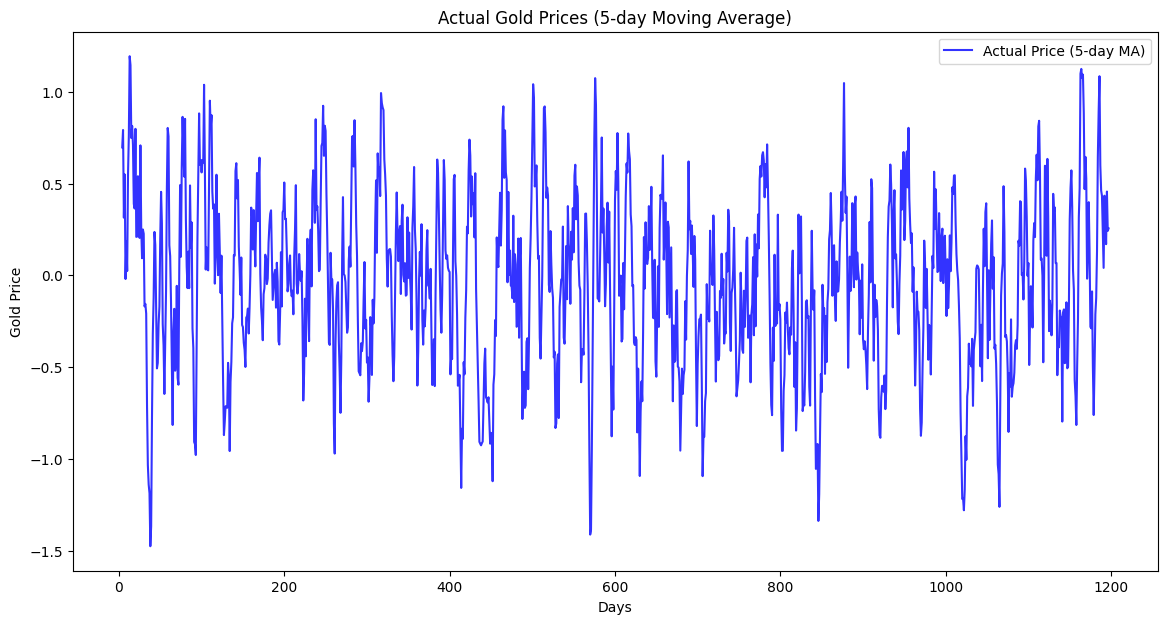

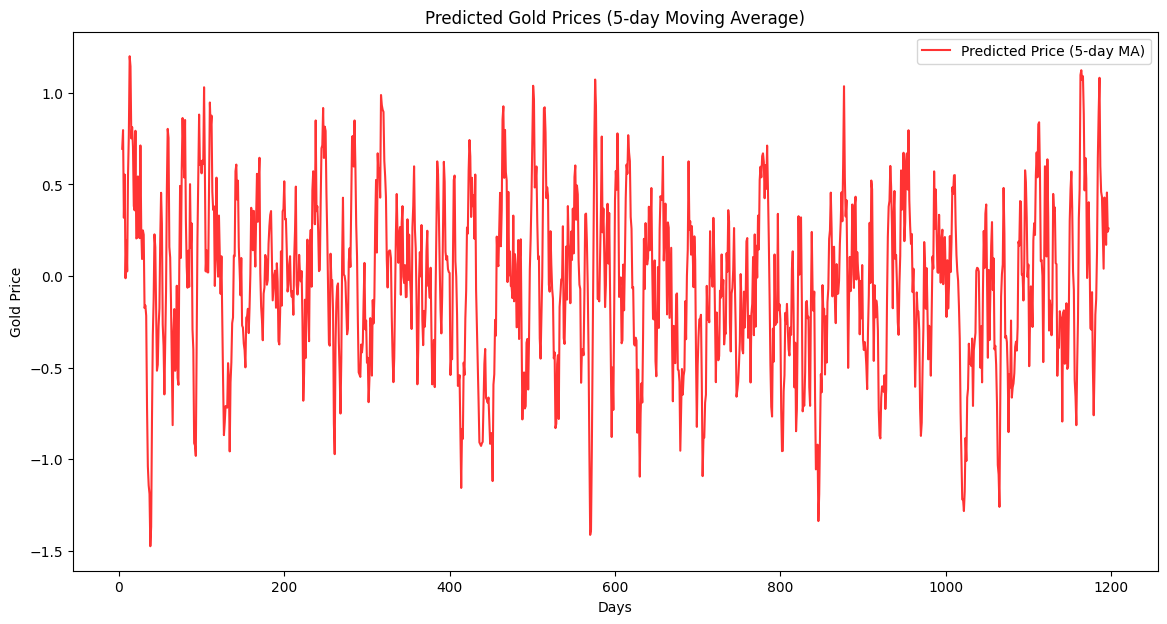

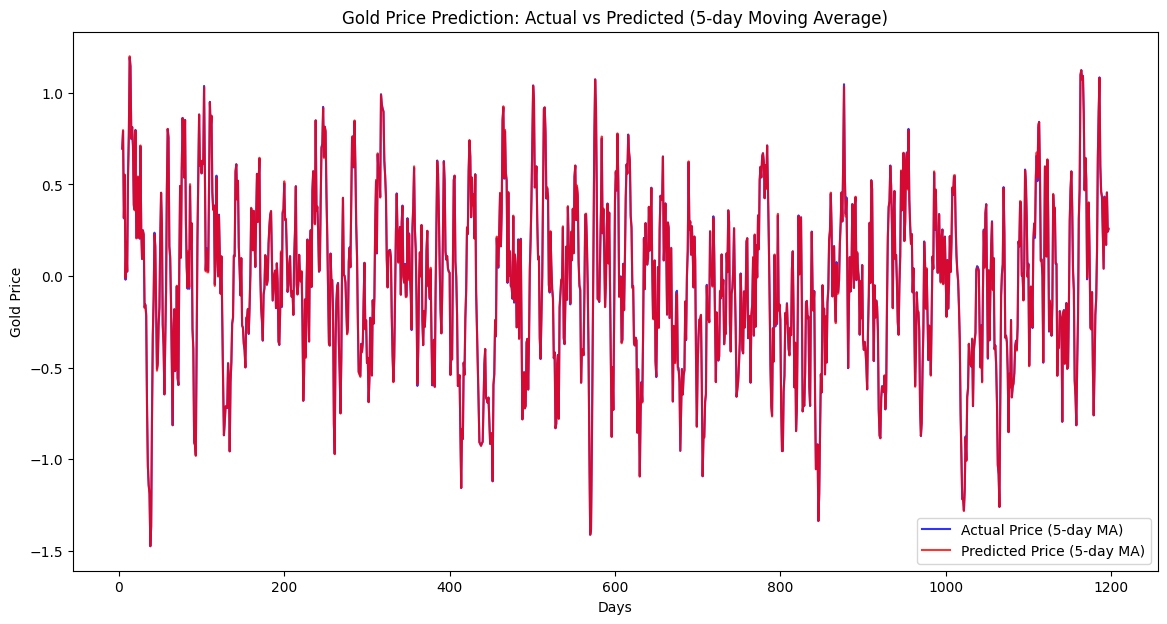

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('C:\\Users\\marco\\Downloads\\AI\\Training\\final.xlsx')  # Correct path to your dataset

# Preprocess the data
# Define features and target variable
X = df.drop(['Date', 'Price'], axis=1)  # Dropping 'Date' and 'Price' as it's the target
y = df['Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Compute the moving averages for the actual and predicted prices
moving_avg_window = 5  # Using a 5-day moving average for smoother lines
y_test_moving_avg = y_test.rolling(window=moving_avg_window).mean()
y_pred_moving_avg = pd.Series(y_pred).rolling(window=moving_avg_window).mean()

# Plot for actual prices with a 5-day moving average
plt.figure(figsize=(14, 7))
plt.plot(y_test_moving_avg.reset_index(drop=True), label='Actual Price (5-day MA)', color='blue', alpha=0.8)
plt.title('Actual Gold Prices (5-day Moving Average)')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Plot for predicted prices with a 5-day moving average
plt.figure(figsize=(14, 7))
plt.plot(y_pred_moving_avg, label='Predicted Price (5-day MA)', color='red', alpha=0.8)
plt.title('Predicted Gold Prices (5-day Moving Average)')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Combined plot for both actual and predicted prices with a 5-day moving average
plt.figure(figsize=(14, 7))
plt.plot(y_test_moving_avg.reset_index(drop=True), label='Actual Price (5-day MA)', color='blue', alpha=0.8)
plt.plot(y_pred_moving_avg, label='Predicted Price (5-day MA)', color='red', alpha=0.8)
plt.title('Gold Price Prediction: Actual vs Predicted (5-day Moving Average)')
plt.xlabel('Days')
plt.ylabel('Gold Price')
plt.legend()
plt.show()
